# Create 2D images of flux maps for testing pdrtpy

In [1]:
import numpy as np
import scipy.stats as stats

from astropy.io import fits
import astropy.wcs as wcs
import astropy.units as u
from astropy.table import Table
from astropy.nddata import NDDataArray, CCDData, NDUncertainty, StdDevUncertainty, VarianceUncertainty, InverseVariance
from astropy.visualization import simple_norm, ZScaleInterval , ImageNormalize
from astropy.visualization.stretch import SinhStretch,  LinearStretch

import matplotlib.pyplot as plt
import matplotlib.colors as mpcolors
from matplotlib import ticker
from matplotlib.lines import Line2D
from pdrtpy.pdrutils import PDRutils
from pdrtpy.measurement import Measurement


/n/algol2/mpound/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:981: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return getattr(self.data, op)(other)


In [2]:

m1 = Measurement(data=30.,uncertainty = StdDevUncertainty(5.),identifier="OI_145", unit="adu")
m2 = Measurement(data=10.,uncertainty = StdDevUncertainty(2.),identifier="CI_609", unit="adu")
m3 = Measurement(data=10.,uncertainty = StdDevUncertainty(1.5),identifier="CO_21", unit="adu")
m4 = Measurement(100.,uncertainty = StdDevUncertainty(10.),identifier="CII_158",unit="adu",debug=True)
m = [m1,m2,m3,m4]

args= 100.0
kwargs= uncertainty identifier unit


In [3]:
xsize=3
ysize=5
crpix1=2
crpix2=3

for a in m:
    # np arrays are opposite of FITS convention
    data = np.full((ysize,xsize),a.flux)
    if False:
        randata = a.flux*np.random.rand(ysize,xsize)
        data = data+randata
    error = np.full((ysize,xsize),a.error)
    #print(data)
    #print(error)
    hdu = fits.PrimaryHDU(data)
    hdu.header['crpix1']=crpix1
    hdu.header['crpix2']=crpix2
    hdu.header['ctype1']='RA---SIN'
    hdu.header['ctype2']='DEC--SIN'
    hdu.header['cdelt1']=0.016667
    hdu.header['cdelt2']=0.016667
    hdu.header['cunit1']='deg'
    hdu.header['cunit2']='deg'
    hdu.header['crval1']=43.3458
    hdu.header['crval2']=19.2514
    hdu.header['equinox']=2000.0
    hdu.header['extname']= a.id+ ' data image'
    hdu.header['extname']= 'DATA'
    #hdu.header['xtension'] = 'image'
    hdu.header['bunit']=a.unit.name
    hde = fits.ImageHDU(error)
    hde.header['crpix1']=crpix1
    hde.header['crpix2']=crpix2
    hde.header['ctype1']='RA--SIN'
    hde.header['ctype2']='DEC-SIN'
    hde.header['cdelt1']=0.016667
    hde.header['cdelt2']=0.016667
    hde.header['cunit1']='deg'
    hde.header['cunit2']='deg'
    hde.header['crval1']=43.3458
    hde.header['crval2']=19.2514
    hde.header['equinox']=2000.0
    hde.header['extname']= 'UNCERT'
    hde.header['bunit']=a.unit.name
    hde.header['utype']='StdDevUncertainty'
    hdul = fits.HDUList([hdu,hde])
    hdul.info()
    hdul.writeto(a.id+"_fakeobs.fits",overwrite=True)

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  DATA          1 PrimaryHDU      19   (3, 5)   float64   
  1  UNCERT        1 ImageHDU        21   (3, 5)   float64   
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  DATA          1 PrimaryHDU      19   (3, 5)   float64   
  1  UNCERT        1 ImageHDU        21   (3, 5)   float64   
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  DATA          1 PrimaryHDU      19   (3, 5)   float64   
  1  UNCERT        1 ImageHDU        21   (3, 5)   float64   
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  DATA          1 PrimaryHDU      19   (3, 5)   float64   
  1  UNCERT        1 ImageHDU        21   (3, 5)   float64   


In [4]:
z2 = Measurement.read("CI_609_fakeobs.fits",identifier='CI_609')
z1 = Measurement.read("OI_145_fakeobs.fits",identifier="OI_145")
z3 = Measurement.read("CO_21_fakeobs.fits",identifier="CO_21")
z4 = Measurement.read("CII_158_fakeobs.fits",identifier="CII_158")
z = [z1,z2,z3,z4]

In [5]:
hh = CCDData.read("CI_609_fakeobs.fits")
hh.header
myhdu = hh.to_hdu()
myhdu[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                    3                                                  
NAXIS2  =                    5                                                  
EXTEND  =                    T                                                  
EXTNAME = 'DATA    '                                                            
BUNIT   = 'adu     '                                                            
WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =                  2.0 / Pixel coordinate of reference point            
CRPIX2  =                  3.0 / Pixel coordinate of reference point            
CDELT1  =             0.016667 / [deg] Coordinate increment at reference point  
CDELT2  =             0.0166

In [6]:
hh.wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 43.3458  19.2514  
CRPIX : 2.0  3.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 0.016667  0.016667  
NAXIS : 3  5

In [9]:
p = PDRutils("current_models.tab",measurements = z)

In [10]:
p._modelfilesUsed


{'OI_145/CII_158': 'o145ciiweb.fits',
 'CI_609/CO_21': 'cico21web.fits',
 'CII_158/CI_609': 'ciici609web.fits'}

In [11]:
p.read_ccd(unit='adu')
p.computeValidRatios()
p.check_ratio_shapes()
p._observedratios['OI_145/CII_158'].shape

(5, 3)

In [12]:
p.computeDeltaSqMap()

In [13]:
type(p._measurements['OI_145'])

pdrtpy.measurement.Measurement

In [14]:
p.computeChisq()
#p._chisq.write("chisq.fits",overwrite=True)
type(p._chisq)

astropy.nddata.ccddata.CCDData

In [ ]:
file="chisq.fits"
k = fits.open(file)
k.info()
k[0].header

In [ ]:
plt.imshow(k[0].data.transpose(2,3,0,1)[0,0,0:,2:],cmap='rainbow')
plt.contour(k[0].data.transpose(2,3,0,1)[0,0,0:,2:])

In [ ]:
s1 = p._measurements[list(p._measurements.keys())[0]].shape
s1

In [ ]:
 np.all([m.shape == s1 for m in p._measurements.values()])

In [ ]:
a = np.ones(20)
b = np.ones(100)
c=b.reshape(10,10)

In [ ]:
p.read_ccd("adu")
p.computeValidRatios()

In [ ]:
np.shape(p._modelratios['OI_145/CII_158'])

In [ ]:
z=np.reshape(p._modelratios['OI_145/CII_158'],(725))

In [ ]:
type(z)

In [ ]:
np.shape(p._observedratios['OI_145/CII_158'])
#np.shape(z)

In [ ]:
ff = list()
gg= list()
for pix in z:
    plane = (p._observedratios['OI_145/CII_158'].flux-pix)/p._observedratios['OI_145/CII_158'].error
    g = (pix - p._observedratios['OI_145/CII_158'].flux)/p._observedratios['OI_145/CII_158'].error
    #print(plane.shape)
    plane2 = plane*plane
    gg2 = g*g
    ff.append(plane2)
    gg.append(gg2)
    

In [ ]:
ngg = np.array(gg)
np.shape(ngg)

In [ ]:
r='OI_145/CII_158'
newshape = np.hstack((p._modelratios[r].shape,p._observedratios[r].shape))
print(newshape)
xqq = np.reshape(ff,newshape)
print(xqq.shape)

In [ ]:
725*23*21
qq=np.reshape(ngg,(29,25,ysize,xsize))
p._modelratios['OI_145/CII_158'].size
print(qq.shape)

In [ ]:
p._deltasq= dict()
p._deltasq['OI_145/CII_158'] = CCDData(ff[0],unit="adu")

In [ ]:
sumary = sum((p._deltasq[r]._data for r in p._deltasq))
len(p._deltasq)-1

In [ ]:
np.hstack((p._modelratios['OI_145/CII_158'].shape,p._observedratios['OI_145/CII_158'].shape))

In [ ]:
np.shape(qqr[0:,0:,0,0])

In [ ]:
plt.imshow(qq[3:,0:,0,0])

In [ ]:
p._chisq.header['CTYPE1']='RA'
p._chisq.header['CTYPE2']='DEC'
p._chisq.header['CTYPE3']='n'
p._chisq.header['CTYPE4']='G0'

In [ ]:
p._chisq.write("test.fits",overwrite=True)

In [ ]:
nic = fits.open("NICMOSn4hk12010_mos.fits")

In [ ]:
p.computeDeltaSqMap()

In [ ]:
p.computeChisq()

In [ ]:
p._reducedChisq.shape

In [ ]:
print(np.min(p._reducedChisq))
plt.imshow(p._chisq[1][1]) 
print(29*25*5*3)
vvv=np.reshape(p._reducedChisq,(725,15))
np.min(p._chisq[10][1])

In [ ]:
plt.ylim([0,10])
plt.plot(vvv[200:300])
np.min(vvv)

<class 'matplotlib.axes._subplots.AxesSubplot'>
(29, 25, 5, 3)
(15, 29, 25)
(15,)


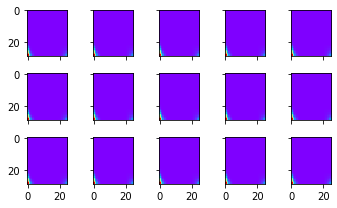

In [18]:
figs, axs = plt.subplots(xsize,ysize, sharex=True,sharey=True, figsize=(ysize,xsize))
axs = axs.flatten()
print(type(axs[0]))
print(np.shape(p._reducedChisq))
imgs = np.reshape(p._reducedChisq,(29,25,15))
img2 = np.swapaxes(imgs,0,1)
img3 = np.swapaxes(img2,0,2)
print(np.shape(img3))
print(np.shape(axs))
i=0
for ax in axs:
    #print(type(ax))
    ax.imshow(img3[i],cmap='rainbow')
    #print(np.shape(imgs[i]))
    #print(np.min(img2[i]))
    i=i+1
plt.tight_layout()

In [ ]:
np.argmin(img3[1],axis=0)
ind = np.unravel_index(np.argmin(img3, axis=None), img3.shape)
print(ind)

In [ ]:
p.getBestnG0()

In [ ]:
k=fits.open("chisqweb.fits")
h = fits.open("chisq.fits")
h.info()
h[0].header


In [ ]:
plt.imshow(k[0].data,cmap='rainbow')

In [ ]:
x=p._reducedChisq.to_hdu()
x.info()
x[0].header

In [ ]:
x.writeto("test2.fits")

In [ ]:
x[0].header["CTYPE1"]="RA---SIN"

In [ ]:
x[0].header

In [ ]:
print(p._observedratios['OI_145/CII_158'].header)

In [ ]:
z4 = Measurement.read("CII_158_fakeobs.fits",identifier="CII_158")

In [ ]:
z4.header

In [ ]:
x = fits.open("CII_158_fakeobs.fits")

In [ ]:
x[0].header

In [ ]:
z4.wcs

In [ ]:
z4.write("z4.fits")

In [ ]:
w=p._reducedChisq.wcs

In [ ]:
w

In [ ]:
w.is_celestial

In [ ]:
lon,lat = w.all_pix2world(1,2,0)

In [ ]:
print(lon,lat)

In [ ]:
p._modelratios['OI_145/CII_158'].header

In [ ]:
type(p._modelratios['OI_145/CII_158'])

In [ ]:
w=p._modelratios['OI_145/CII_158'].wcs

In [ ]:
lon,lat = w.all_pix2world([[1,1],[1,2]],0)

In [ ]:
print(lon,lat)

In [ ]:
w2=p._chisq.wcs

In [ ]:
lon,lat = w2.all_pix2world([[1,1],[1,2]],0)

In [ ]:
print(lon,lat)

In [ ]:
a=np.argmin(p._chisq,axis=None)
print(a)

In [ ]:
ind = np.unravel_index(a, p._chisq.shape)
print(ind)

In [ ]:
p._reducedChisq.data[ind]

In [ ]:
p._chisq = p._chisq+0.01*np.random.random_sample(p._chisq.shape)

In [ ]:
a=np.argmin(p._reducedChisq,axis=0)
qqq=a.shape
print(a.shape)
print(a.transpose().shape)
a.transpose()
#p._reducedChisq[:,1].shape

In [ ]:
p._reducedChisq[:][:][0]

In [ ]:
ind = np.unravel_index(a, p._chisq.shape)
print(ind)

In [ ]:
np.argmin(np.min(p._chisq[:,:,1]))

In [ ]:
p._chisq[:,:,2].shape

In [ ]:
29*25

In [ ]:
np.argmin(imgs,axis=1)

In [ ]:
imgs.shape

In [ ]:
b = np.array([[[33,32,31,3,31,34,35],[44,43,41,48,42,73,49],[525,522,523,526,527,528,529]],[[3,2,1,0,1.1,1.2,1.33],[14,13,11,18,12.1,13.2,14.5],[25,22,23,26,27,28,29]]])
print(b.shape)
b

In [ ]:
q=np.argmin(b,axis=2)
print(q)
print(q.shape)
xf=np.zeros(q.shape)
for j in range(len(q)):
    for i in range(len(q[0])):
        xf[j,i] = (b[j][i][q[j][i]])
        #print(j,i,q[j,i])

In [ ]:
xf

In [ ]:
len(q[0])

In [ ]:
b.shape